In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers,losses,datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

tf.__version__

'2.2.0'

Label:  0


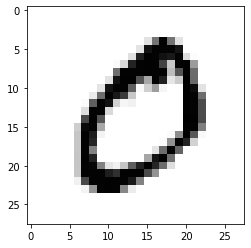

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

plt.imshow(train_images[1], cmap='Greys')

print('Label: ', train_labels[1])

In [3]:
#normalization between 0 and 1
shape_size=28*28

train_images = train_images.reshape(-1, shape_size) / 255.0
test_images = test_images.reshape(-1, shape_size) / 255.0

In [5]:
model = Sequential([
    Dense(shape_size, activation=tf.nn.relu,name="Input"),
    Dense(shape_size/2, activation=tf.nn.relu,name="Hidden1"),
    Dropout(0.2,name="Dropout1"),
    Dense(shape_size/4, activation=tf.nn.relu,name="Input"),
    Dropout(0.2,name="Dropout2"),
    #shape size dont care, because i want to output this Dense
    Dense(10, activation=tf.nn.softmax,name="Output")
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=(['accuracy'])
)
history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=1)
model.summary()

938/938 [==============================] - 5s 5ms/step - loss: 1.5620 - accuracy: 0.9026
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                multiple                  615440    
_________________________________________________________________
Hidden1 (Dense)              multiple                  307720    
_________________________________________________________________
Dropout1 (Dropout)           multiple                  0         
_________________________________________________________________
Input (Dense)                multiple                  77028     
_________________________________________________________________
Dropout2 (Dropout)           multiple                  0         
_________________________________________________________________
Output (Dense)               multiple                  1970      
Total params: 1,002,158
Trainable

In [8]:
model.fit(train_images, train_labels, epochs = 5, validation_data = (test_images, test_labels))

loss, acc = model.evaluate(test_images, test_labels)

print("Trained model, acc {:5.2f}".format(100*acc))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5514 - accuracy: 0.9098 - val_loss: 1.5245 - val_accuracy: 0.9368
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5324 - accuracy: 0.9288 - val_loss: 1.5221 - val_accuracy: 0.9391
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5249 - accuracy: 0.9362 - val_loss: 1.5351 - val_accuracy: 0.9260
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5387 - accuracy: 0.9224 - val_loss: 1.5404 - val_accuracy: 0.9206
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.5538 - accuracy: 0.9074
Trained model, acc 90.74


In [12]:
model.save("modell",save_format='h5')

ValueError: Unable to create group (name already exists)